In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1


### a)

(50,)
(50,)


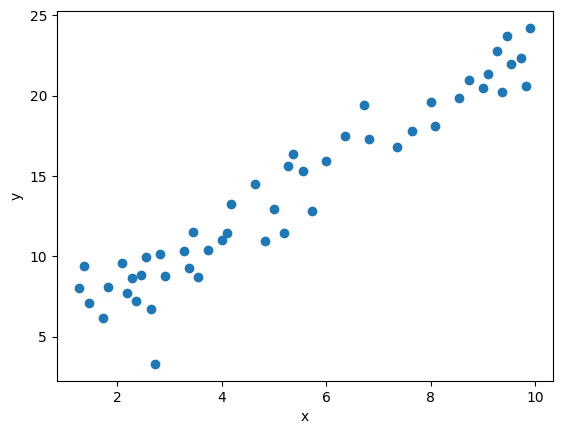

In [2]:
dados = np.load("arquivos/ex1_a.npz")
x = dados["x"]
y = dados["y"]

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x

print(x.shape)
print(y.shape)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Vemos que os dados apresentam uma reta da forma Ax + b, então encontraremos a melhor reta que representa esses pontos.

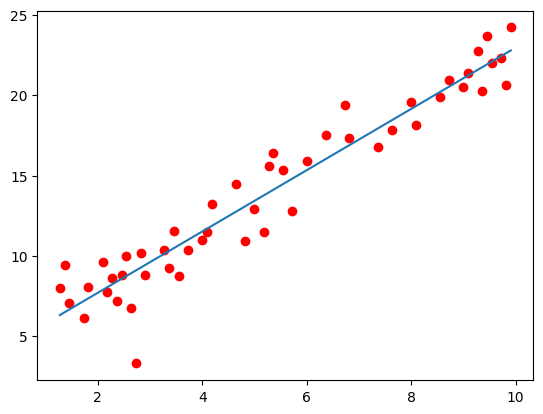

In [3]:
A = np.ones((50, 2))
A[:, 1] = x

v = np.linalg.lstsq(A, y, rcond=0)[0]
f = lambda x: v[0] + v[1] * x
f = np.vectorize(f)

plt.plot(x, y, 'ro')
plt.plot(x, f(x))

### b)

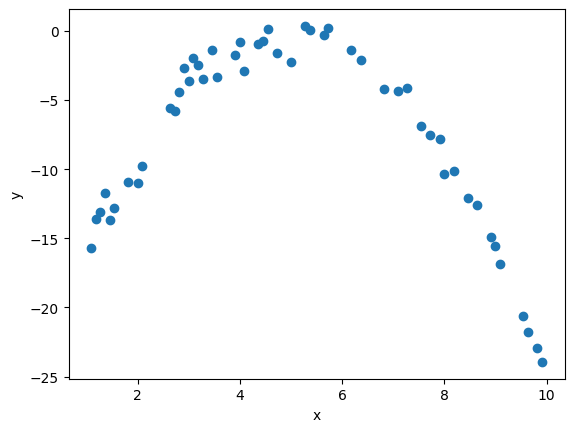

In [4]:
dados = np.load("arquivos/ex1_b.npz")
x = dados["x"]
y = dados["y"]

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

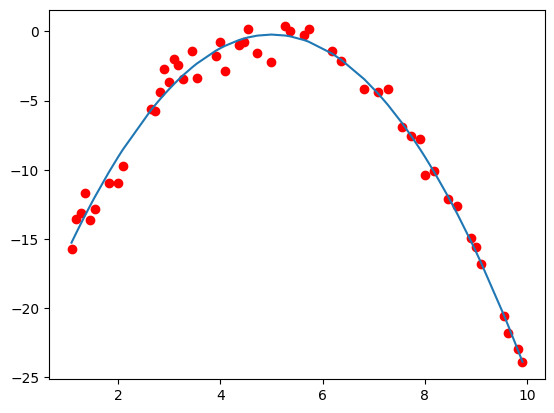

In [5]:
A = np.ones((50, 3))
A[:, 1] = x
A[:, 2] = x ** 2

v = np.linalg.lstsq(A, y, rcond=0)[0]
f = lambda x: v[0] + v[1] * x + v[2] * (x ** 2)
f = np.vectorize(f)

plt.plot(x, y, 'ro')
plt.plot(x, f(x))

### c)

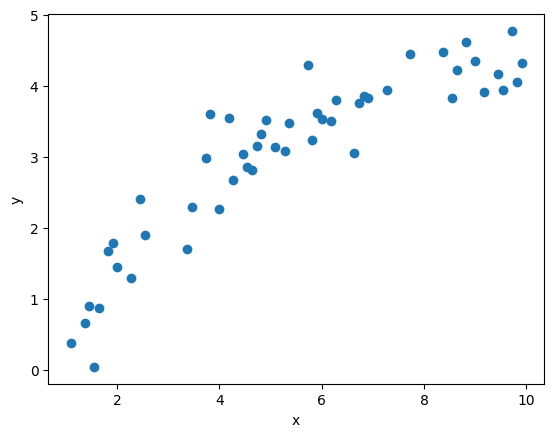

In [6]:
dados = np.load("arquivos/ex1_c.npz")
x = dados["x"]
y = dados["y"]

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

O gráfico aparenta ser de uma função logarítmica.

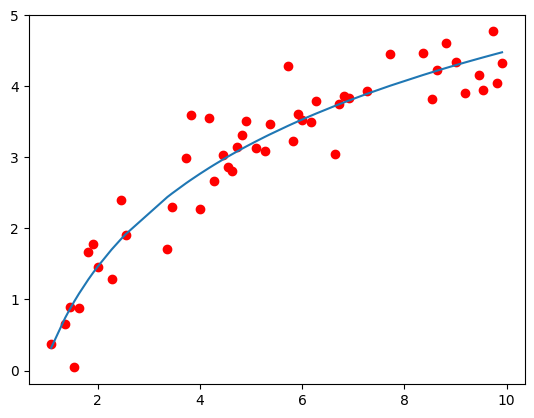

In [7]:
A = np.ones((50, 2))
A[:, 1] = np.log2(x)

v = np.linalg.lstsq(A, y, rcond=0)[0]
f = lambda x: v[0] + v[1] * np.log2(x)
f = np.vectorize(f)

plt.plot(x, y, 'ro')
plt.plot(x, f(x))

### d)

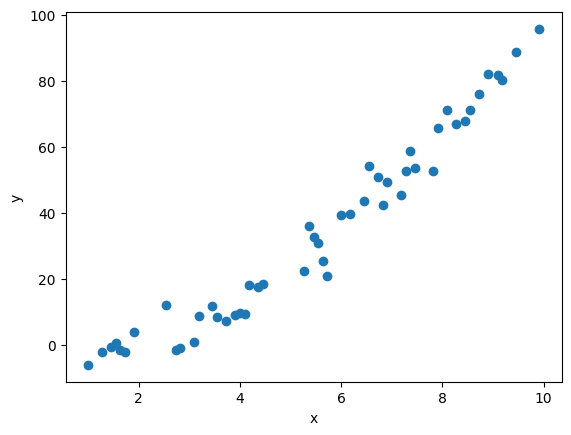

In [8]:
dados = np.load("arquivos/ex1_d.npz")
x = dados["x"]
y = dados["y"]

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

O gráfico aparenta ser quadrática (ou exponencial).

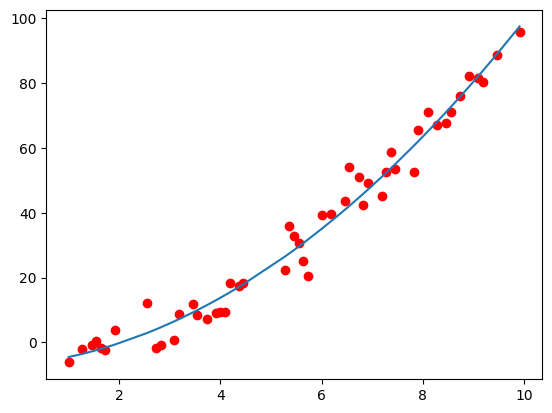

In [9]:
A = np.ones((50, 3))
A[:, 1] = x
A[:, 2] = x ** 2

v = np.linalg.lstsq(A, y, rcond=0)[0]
f = lambda x: v[0] + v[1] * x + v[2] * (x ** 2)
f = np.vectorize(f)

plt.plot(x, y, 'ro')
plt.plot(x, f(x))

# Exercício 2

### a)

(10, 10)
(10, 10)
(10, 10)


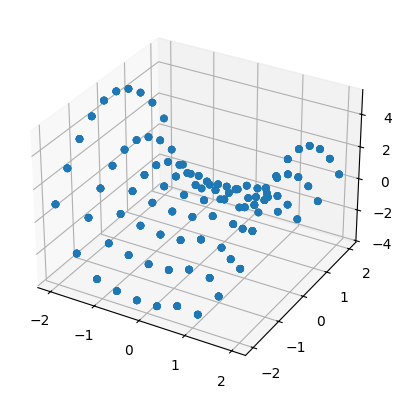

In [10]:
dados = np.load("arquivos/ex2.npz")
x = dados["x"]
y = dados["y"]
z = dados["z"]

print(x.shape)
print(y.shape)
print(z.shape)

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x
z = z[idx] #passando z com base na ordenação de x

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
plt.show()

In [11]:
x_r = x.ravel() #achatando x para ficar (100, 1)
y_r = y.ravel()
z_r = z.ravel()

A = np.ones((len(x_r), 6))
A[:, 1] = x_r
A[:, 2] = y_r
A[:, 3] = x_r ** 2
A[:, 4] = y_r ** 2
A[:, 5] = x_r * y_r


v = np.linalg.lstsq(A, z_r, rcond=0)[0]
f = lambda X, Y: v[0] + v[1] * X + v[2] * Y + v[3] * (X ** 2) + v[4] * (Y ** 2) + v[5] * (X * Y)

### b)

In [12]:
# Calculando o erro
erro = z_r - f(x_r, y_r)
erro = erro ** 2
rms = np.sqrt(np.sum(erro) * 1 / erro.shape[0])
print(rms)

0.38171235461825115


### c)

Text(0.5, 0.92, '3D surface plot of f(x,y)')

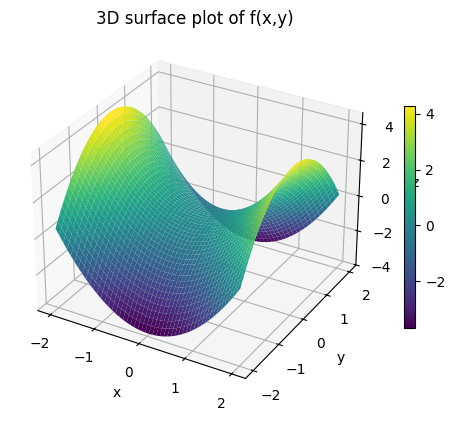

In [13]:
x_grid = np.linspace(x.min(), x.max(), 50)
y_grid = np.linspace(y.min(), y.max(), 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D surface plot of f(x,y)')

# Exercício 3

### a)

NpzFile 'arquivos/ex3.npz' with keys: ano, transistors


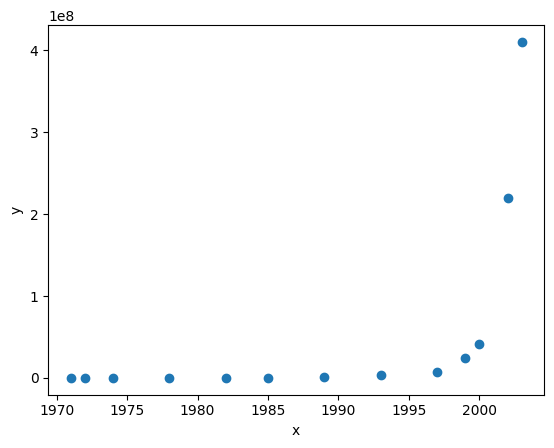

In [ ]:
dados = np.load("arquivos/ex3.npz")

print(dados)
x_original = dados["ano"]
y_original = dados["transistors"]

#ordenando x e utilizando e retornando os indices
idx = np.argsort(x)
x = x[idx] #ordenando x
y = y[idx] #passando y com base na ordenação de x

plt.scatter(x_original, y_original)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Os pontos aparentam ser de um grafico exponencial.

Precisamos linearizar nosso problema, para isso, aplicamos a inversa da função exponencial dos dois lados:

Partimos do modelo exponencial:

$$
y = A e^{Bx}
$$

$$
\ln(y) = \ln(A e^{Bx})
$$

$$
\ln(A e^{Bx}) = \ln(A) + \ln(e^{Bx})
$$

$$
\ln(e^{k}) = k
$$


$$
\ln(e^{Bx}) = Bx
$$

$$
\ln(y) = \ln(A) + Bx
$$

Portanto, ao aplicar logaritmo natural, o modelo exponencial se torna linear:

$$
\ln(y) = \ln(A) + Bx
$$


### b)

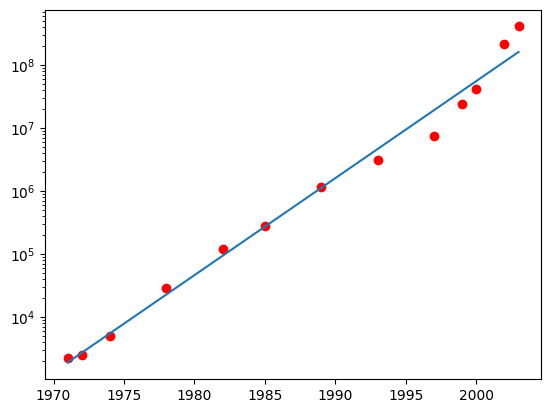

In [15]:
#transformando y em linear
y_linear = np.log(y_original) #log é o mesmo de ln no numpy

A = np.ones((len(x_original), 2))
A[:, 1] = x_original

v = np.linalg.lstsq(A, y_linear, rcond=0)[0]
#reconstruir a funcao original
f = lambda x: np.exp(v[0]+ v[1] * x)
f = np.vectorize(f)

plt.yscale("log")
plt.plot(x_original, y_original, 'ro')
plt.plot(x_original, f(x_original))

$$
\mathrm{RMS} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$


$y_i$: são os valores reais, <br>
$\hat{y}_i = f(x_i)$: são os valores ajustados pelo modelo,<br>
$n$: é o número de pontos.<br>


In [16]:
#calculando rms
erro = (y_original - f(x_original)) ** 2
rms = np.sqrt(np.mean(np.sum(erro)))
print(rms)


271464902.8443641


### c)

y real:  4,000,000,000
y real:  8,002,430,198


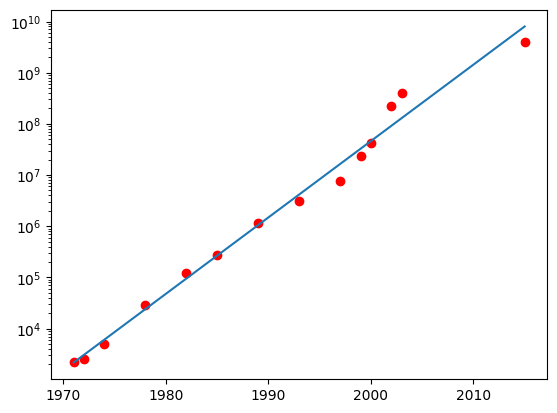

In [17]:
x_prev = 2015
y_real = 4 * (10 ** 9) #notacao 4 x 10^9

#adicionando os valores nos vetores
x_original = np.append(x_original, x_prev)
y_original = np.append(y_original, y_real)

#realizando o metodo novamente depois de adicionar os valores
y_linear = np.log(y_original) #log é o mesmo de ln no numpy

A = np.ones((len(x_original), 2))
A[:, 1] = x_original

v = np.linalg.lstsq(A, y_linear, rcond=0)[0]
#reconstruir a funcao original
f = lambda x: np.exp(v[0]+ v[1] * x)
f = np.vectorize(f)

y_modelo = f(x_prev)

plt.yscale("log")
plt.plot(x_original, y_original, 'ro')
plt.plot(x_original, f(x_original))

print(f"y real:  {y_real:,.0f}")
print(f"y real:  {y_modelo:,.0f}")

In [18]:
#Comparando com a lei de Moore (o numero de transistores dobra a cada 1.5 ou 2 anos)
print(x_original)
def lei_moore(x_original, y_original, ano):
    
    #podemos utilizar uma formula que dobra a cada dois anos
    ano_inicial = x_original[0]
    transistores_base = y_original[0]

    diferenca_anos = ano - ano_inicial
    periodos_dobra = diferenca_anos / 2
    y_previsto = transistores_base * (2 ** periodos_dobra)
    
    return y_previsto
x_moore = lei_moore(x_original, y_original, 2015)

print(f"y real:  {y_real:,.0f}")
print(f"y real:  {y_modelo:,.0f}")
print(f"x_moore: {x_moore:,.0f}")

[1971 1972 1974 1978 1982 1985 1989 1993 1997 1999 2000 2002 2003 2015]
y real:  4,000,000,000
y real:  8,002,430,198
x_moore: 9,437,184,000


podemos concluir que o modelo chega próximo do valor calculado pela lei de moore.

### a)

In [19]:
dados = np.load("arquivos/ex4.npz")
cycle = dados["cycle"]
temperature = dados["temperature"]
capacity = dados["capacity"]

idx = np.argsort(cycle)
cycle = cycle[idx] 
temperature = temperature[idx] 
capacity = capacity[idx]

Escrevendo o problema da forma
$$
A\theta \approx C
$$

In [20]:
A = np.ones((len(cycle), 6))
A[:, 1] = cycle
A[:, 2] = temperature
A[:, 3] = cycle ** 2
A[:, 4] = temperature ** 2
A[:, 5] = cycle * temperature



$$
\hat C(n,T) = \theta_0 + \theta_1n + \theta_2T + \theta_3n^{2} + \theta_4T^{2} + \theta_5nT
$$

### b)

In [21]:
theta = np.linalg.lstsq(A, capacity, rcond=0)[0]

C = lambda n, t: theta[0] + theta[1] * n + theta[2] * t + theta[3] * (n ** 2) + theta[4] * (t ** 2) + theta[3] * (n * t)
C = np.vectorize(C)

erro = (capacity - C(cycle, temperature)) ** 2
rms = np.sqrt(np.mean(np.sum(erro)))

print(rms)

96.65340193632817


### c)

In [22]:
print(f"capacidade (500 ciclos, 25°C) = {C(500, 25)}")
print(f"capacidade (500 ciclos, 45°C) = {C(500, 45)}")
print(f"capacidade (1500 ciclos, 25°C) = {C(1500, 25)}")

capacidade (500 ciclos, 25°C) = 86.83716300189418
capacidade (500 ciclos, 45°C) = 56.32393019802886
capacidade (1500 ciclos, 25°C) = 55.743530682074194


Podemos ver que quanto maior a temperatura, menor a capacidade (inversamente proporcionais) e quanto mais ciclos, menor a capacidade (inversamente proporcionais)

### d)

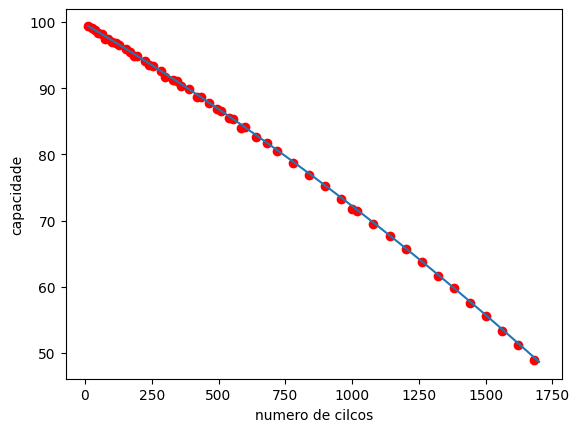

In [23]:
#filtrando o dataframe com 23 <= temperatura <= 27
t_estreito = temperature[(temperature >= 23) & (temperature <= 27)]

n_estreito = cycle[(temperature >= 23) & (temperature <= 27)]

c_estreito = capacity[(temperature >= 23) & (temperature <= 27)]

plt.plot(n_estreito, C(n_estreito, t_estreito), 'ro')
plt.xlabel("numero de cilcos")
plt.ylabel("capacidade")
plt.plot(cycle, C(cycle, 25))

Analisando os dados reais vindos dos arquivos e a curva gerada pelo modelo, vemos que o modelo foi muito preciso pois a curva coincide com os pontos.